## Author: Ranjeeta Bhattacharya


## Description: This notebook attempts to analyze MeToo dataset and unearth hidden patterns from end user responses.

In [2]:
## Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

## To ignore SettingWithCopyWarning

pd.set_option('mode.chained_assignment', None)

In [3]:
## Reading input file in a dataframe

inputFile = pd.read_excel("Survey_on_Sexual_Assault.xlsx")

In [4]:
## Dropping the redundant second header row from dataframe

inputFile.drop(inputFile.index[0], axis = 0, inplace=True)

In [5]:
## Displaying records 

inputFile.head()

#inputFile.info()

,Respondent ID,Collector ID,Start Date,End Date,IP Address,Email Address,First Name,Last Name,Custom Data 1,How old are you?,...,Was the perpetrator arrested?.1,How did the assault impact you?.1,What options do you wish were available to survivors?.1,What do you think of a legally admissible self-evidence collection kit?,Is there anything else that you would like to share?,What services do you wish were available to survivors?,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56
1,1.108816e+10,247838599.0,2019-10-23 14:49:26,2019-10-23 14:51:01,24.220.143.163,NaN,NaN,NaN,NaN,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.108816e+10,247838599.0,2019-10-23 14:48:25,2019-10-23 14:52:51,110.173.190.131,NaN,NaN,NaN,NaN,32,...,No,VERY MUCH.,OPTION TO TAKE REVENGE.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.108813e+10,247838599.0,2019-10-23 14:39:13,2019-10-23 14:43:02,69.248.24.39,NaN,NaN,NaN,NaN,34,...,No,distrust law enforcement a lot more,anonymous online chat support groups,"theoretically, it sounds good, but lawyers wou...",not at this time,NaN,NaN,Counseling,NaN,NaN
4,1.108809e+10,247838599.0,2019-10-23 14:26:43,2019-10-23 14:30:30,24.129.211.210,NaN,NaN,NaN,NaN,27,...,No,I think it made me alot more distrustful of pe...,I wish victims didnt blame themselves because ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.108790e+10,247838599.0,2019-10-23 13:25:46,2019-10-23 13:29:04,38.101.101.254,NaN,NaN,NaN,NaN,31,...,No,it's made me more aware of my surroundings and...,i'm unsure.,i think it's a good idea. people are afraid to...,no,Telemedicine,Rape Kit Tracking System,Counseling,At-Home Prescription,Therapy


In [6]:
## Dropping columns with all empty values

inputFile = inputFile.dropna(how='all', axis=1)

In [7]:
## Checking dataframe 

inputFile.head()

#inputFile.info()

,Respondent ID,Collector ID,Start Date,End Date,IP Address,How old are you?,How old were you when you were assaulted?,What gender do you identify with?,"Where were you assaulted? (Home, university, work or other location)",Did you know your assailant?,...,Was the perpetrator arrested?.1,How did the assault impact you?.1,What options do you wish were available to survivors?.1,What do you think of a legally admissible self-evidence collection kit?,Is there anything else that you would like to share?,What services do you wish were available to survivors?,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56
1,1.108816e+10,247838599.0,2019-10-23 14:49:26,2019-10-23 14:51:01,24.220.143.163,26,Under 18,female,home,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.108816e+10,247838599.0,2019-10-23 14:48:25,2019-10-23 14:52:51,110.173.190.131,32,18-24,male,University,Yes,...,No,VERY MUCH.,OPTION TO TAKE REVENGE.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.108813e+10,247838599.0,2019-10-23 14:39:13,2019-10-23 14:43:02,69.248.24.39,34,25-34,Female,home,Yes,...,No,distrust law enforcement a lot more,anonymous online chat support groups,"theoretically, it sounds good, but lawyers wou...",not at this time,NaN,NaN,Counseling,NaN,NaN
4,1.108809e+10,247838599.0,2019-10-23 14:26:43,2019-10-23 14:30:30,24.129.211.210,27,18-24,female,home,Yes,...,No,I think it made me alot more distrustful of pe...,I wish victims didnt blame themselves because ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.108790e+10,247838599.0,2019-10-23 13:25:46,2019-10-23 13:29:04,38.101.101.254,31,18-24,female,work,Yes,...,No,it's made me more aware of my surroundings and...,i'm unsure.,i think it's a good idea. people are afraid to...,no,Telemedicine,Rape Kit Tracking System,Counseling,At-Home Prescription,Therapy


## File preprocessing

In [8]:
## Replace all NaN values in the dataframe with empty string

inputFile = inputFile.fillna('')

In [9]:
## Displaying all columns in the dataframe

inputFile.columns

Index(['Respondent ID', 'Collector ID', 'Start Date', 'End Date', 'IP Address',
       'How old are you?', 'How old were you when you were assaulted?',
       'What gender do you identify with?',
       'Where were you assaulted? (Home, university, work or other location)',
       'Did you know your assailant?  ',
       'Are you aware of the resources available for sexual assault victims? If yes, name a few.',
       'How knowledgable are you about what happens when you report a sexual assault?',
       'Did you report your assault?', 'What state were you assaulted in?',
       'What made you report? ',
       'Did you do a Sexual Assault Examination Kit (SAEK) at a hospital?',
       'How long did it take you to get to a hospital where a rape kit is provided?',
       'Was your hospital rape kit free?',
       'What was your experience with the SAEK at the hospital? ',
       'How long did your hospital rape kit process take?',
       'Were you physically injured as a result of the a

In [10]:
# Renaming columns to capture reponse for survey question: 
#'What services do you wish were available to survivors - Updated'?

inputFile['What services do you wish were available to survivors? (Choice - Telemedicine)'] = inputFile['What services do you wish were available to survivors?'] 

inputFile['What services do you wish were available to survivors? (Choice - Rape Kit Tracking System)'] = inputFile['Unnamed: 53']

inputFile['What services do you wish were available to survivors? (Choice - Counseling)'] = inputFile['Unnamed: 54']

inputFile['What services do you wish were available to survivors? (Choice - At-Home Prescription)'] = inputFile['Unnamed: 55']

inputFile['What services do you wish were available to survivors? (Choice - Therapy)'] = inputFile['Unnamed: 56']


In [11]:
## Dropping unnamed response columns along with other irrelevant ones

inputFile = inputFile.drop(['Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Collector ID', 'Start Date', 'End Date', 'IP Address', 'What services do you wish were available to survivors?'], axis=1)

In [12]:
## Concatenating reponses together for some repeatative columns

inputFile['Did you do a Sexual Assault Examination Kit (SAEK) at a hospital?'] = inputFile['Did you do a Sexual Assault Examination Kit (SAEK) at a hospital?'] + ' ' + inputFile['Did you do a Sexual Assault Examination Kit (SAEK) at a hospital?.1']

inputFile['Were you physically injured as a result of the assault?'] = inputFile['Were you physically injured as a result of the assault?'] + ' ' + inputFile['Were you physically injured as a result of the assault?.1']

inputFile['Were you aware of the resources available for sexual assault victims during the time?'] = inputFile['Were you aware of the resources available for sexual assault victims during the time?'] + ' ' + inputFile['Were you aware of the resources available for sexual assault victims during the time?.1']

inputFile['Did you get Prophylactics for STD?'] = inputFile['Did you get Prophylactics for STD?'] + ' ' + inputFile['Did you get Prophylactics for STD?.1']

inputFile['Did you use Plan B?'] = inputFile['Did you use Plan B?'] + ' ' + inputFile['Did you use Plan B?.1']

inputFile['If you used any resources, which one did you use? How useful was the resource in helping you?'] = inputFile['If you used any resources, which one did you use? How useful was the resource in helping you?'] + ' ' + inputFile['If you used any resources, which one did you use? How useful was the resource in helping you?.1']

inputFile['Did you share/disclose details of your assault with anyone? If yes, when? And why?'] = inputFile['Did you share/disclose details of your assault with anyone? If yes, when? And why?'] + ' ' + inputFile['Did you share/disclose details of your assault with anyone? If yes, when? And why?.1']

inputFile['Was the perpetrator arrested?'] = inputFile['Was the perpetrator arrested?'] + ' ' + inputFile['Was the perpetrator arrested?.1']

inputFile['How did the assault impact you?'] = inputFile['How did the assault impact you?'] + ' ' + inputFile['How did the assault impact you?.1']

inputFile['What options do you wish were available to survivors?'] = inputFile['What options do you wish were available to survivors?'] + ' ' + inputFile['What options do you wish were available to survivors?.1']

inputFile['How did the assault impact you?'] = inputFile['How did the assault impact you?'] + ' ' + inputFile['How did the assault impact you?']

inputFile['What options do you wish were available to survivors?'] = inputFile['What options do you wish were available to survivors?'] + ' ' + inputFile['What options do you wish were available to survivors?']

inputFile['What was your experience with the SAEK at the hospital?'] = inputFile['What was your experience with the SAEK at the hospital?'] + ' ' + str(inputFile['What was your experience with the SAEK at the hospital?\xa0'])

In [13]:
## Dropping repeated columns post concatenation

inputFile = inputFile.drop(['Did you do a Sexual Assault Examination Kit (SAEK) at a hospital?.1', 'Were you physically injured as a result of the assault?.1', 'Were you aware of the resources available for sexual assault victims during the time?.1', 'Did you get Prophylactics for STD?.1', 'Did you use Plan B?.1', 'If you used any resources, which one did you use? How useful was the resource in helping you?.1', 'Did you share/disclose details of your assault with anyone? If yes, when? And why?.1', 'Was the perpetrator arrested?.1', 'How did the assault impact you?.1', 'What options do you wish were available to survivors?.1', 'How did the assault impact you?', 'What options do you wish were available to survivors?', 'What was your experience with the SAEK at the hospital?\xa0'], axis=1)

In [14]:
## Checking final resultant dataframe

inputFile.head()

,Respondent ID,How old are you?,How old were you when you were assaulted?,What gender do you identify with?,"Where were you assaulted? (Home, university, work or other location)",Did you know your assailant?,"Are you aware of the resources available for sexual assault victims? If yes, name a few.",How knowledgable are you about what happens when you report a sexual assault?,Did you report your assault?,What state were you assaulted in?,...,What was your experience with the SAEK at the hospital?,Did you save any evidence?,"If you saved evidence, what type of evidence did you save?",What do you think of a legally admissible self-evidence collection kit?,Is there anything else that you would like to share?,What services do you wish were available to survivors? (Choice - Telemedicine),What services do you wish were available to survivors? (Choice - Rape Kit Tracking System),What services do you wish were available to survivors? (Choice - Counseling),What services do you wish were available to survivors? (Choice - At-Home Prescription),What services do you wish were available to survivors? (Choice - Therapy)
1,1.108816e+10,26,Under 18,female,home,Yes,"yes, online forums, therapy,",Knowledgable,Yes,South Dakota,...,1 \n2 ...,,,,,,,,,
2,1.108816e+10,32,18-24,male,University,Yes,no,Some idea,No,Minnesota,...,THEY WERE HELPFUL. 1 ...,No,NO,,,,,,,
3,1.108813e+10,34,25-34,Female,home,Yes,no,No idea,No,New Jersey,...,not applicable 1 ...,No,not applicable,"theoretically, it sounds good, but lawyers wou...",not at this time,,,Counseling,,
4,1.108809e+10,27,18-24,female,home,Yes,"yes, the Police, Rape Crisis Center",Knowledgable,No,Alabama,...,na 1 \n2...,No,na,,,,,,,
5,1.108790e+10,31,18-24,female,work,Yes,"yes - RAINN, sexual assault hotline, rape cris...",Some idea,No,Ohio,...,1 \n2 ...,No,,i think it's a good idea. people are afraid to...,no,Telemedicine,Rape Kit Tracking System,Counseling,At-Home Prescription,Therapy


In [15]:
## Checking resultant dataframe columns after concatenation

inputFile.columns

Index(['Respondent ID', 'How old are you?',
       'How old were you when you were assaulted?',
       'What gender do you identify with?',
       'Where were you assaulted? (Home, university, work or other location)',
       'Did you know your assailant?  ',
       'Are you aware of the resources available for sexual assault victims? If yes, name a few.',
       'How knowledgable are you about what happens when you report a sexual assault?',
       'Did you report your assault?', 'What state were you assaulted in?',
       'What made you report? ',
       'Did you do a Sexual Assault Examination Kit (SAEK) at a hospital?',
       'How long did it take you to get to a hospital where a rape kit is provided?',
       'Was your hospital rape kit free?',
       'How long did your hospital rape kit process take?',
       'Were you physically injured as a result of the assault?',
       'Were you aware of the resources available for sexual assault victims during the time?',
       'Did you g

In [16]:
## Stripping white spaces from the entire dataframe content

inputFile = inputFile.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [17]:
## Replacing gender values with constants for column 'What gender do you identify with?'

inputFile['What gender do you identify with?'] = inputFile['What gender do you identify with?'].replace({'female':'Female', 'male':'Male', 'FEMALE':'Female', 
                                                                                                         'genderfluid':'Genderfluid', 'woman':'Female','f':'Female',
                                                                                                         'A':'Others', 'native american':'Others', 'womqn':'Female',
                                                                                                         'famale':'Female', 'gender nonconforming':'Nonconforming',
                                                                                                         'Heterosexual female':'Female', 'Woman':'Female', 'man':'Male',
                                                                                                         'Non Binary':'Others','Nonbinary':'Others','MALE':'Male','WOMAN':'Female',
                                                                                                         'femals':'Female','Non-binary':'Others','Remake':'Others', 'F':'Female'})



In [18]:
## Checking contents of dataframe post replacement

inputFile['What gender do you identify with?'].value_counts()

Female           593
Male             161
Others             6
Genderfluid        2
Nonconforming      1
Name: What gender do you identify with?, dtype: int64

In [19]:
## Evaluating contents of each column containing free text


#inputFile['Where were you assaulted? (Home, university, work or other location)'].unique()
#inputFile['Are you aware of the resources available for sexual assault victims? If yes, name a few.'].unique()
#inputFile['What made you report?t']
#inputFile['What was your experience with the SAEK at the hospital?']
#inputFile['If you used any resources, which one did you use? How useful was the resource in helping you?']
#inputFile['Did you share/disclose details of your assault with anyone? If yes, when? And why?']
#inputFile['Was there a court case? If yes, what was the result?']
#inputFile['How did the assault impact you?']
#inputFile['What options do you wish were available to survivors?']
#inputFile['Why didn’t you report?']
#inputFile['If you saved evidence, what type of evidence did you save?']
#inputFile['If you used any resources, which one did you use? How useful was the resource in helping you?']
#inputFile['Did you share/disclose details of your assault with anyone? If yes, when? And why?']
#inputFile['What do you think of a legally admissible self-evidence collection kit?']
#inputFile['Is there anything else that you would like to share?']


In [20]:
inputFile.to_excel("final_sample.xls", index = False)

In [21]:
inputFile.columns

Index(['Respondent ID', 'How old are you?',
       'How old were you when you were assaulted?',
       'What gender do you identify with?',
       'Where were you assaulted? (Home, university, work or other location)',
       'Did you know your assailant?  ',
       'Are you aware of the resources available for sexual assault victims? If yes, name a few.',
       'How knowledgable are you about what happens when you report a sexual assault?',
       'Did you report your assault?', 'What state were you assaulted in?',
       'What made you report? ',
       'Did you do a Sexual Assault Examination Kit (SAEK) at a hospital?',
       'How long did it take you to get to a hospital where a rape kit is provided?',
       'Was your hospital rape kit free?',
       'How long did your hospital rape kit process take?',
       'Were you physically injured as a result of the assault?',
       'Were you aware of the resources available for sexual assault victims during the time?',
       'Did you g

In [22]:
## Importing NLTK (Natural Language Toolkit) libraries

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords


nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

# Analyzing contents of column "Are you aware of the resources available for sexual assault victims? If yes, name a few."

# Tokenizing and identifying keywords helpful for understanding views.

In [23]:
## Tokenizing column 

tokenized_word = word_tokenize(str(inputFile['Are you aware of the resources available for sexual assault victims? If yes, name a few.']))

#fdist = FreqDist(tokenized_word)

stop_words=set(stopwords.words("english"))

filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)

print("Filtered Sentence:",filtered_sent)

Filtered Sentence: ['1', 'yes', ',', 'online', 'forums', ',', 'therapy', ',', '2', '3', '4', 'yes', ',', 'Police', ',', 'Rape', 'Crisis', 'Center', '5', 'yes', '-', 'RAINN', ',', 'sexual', 'assault', 'hotline', ',', 'rape', 'cris', '...', '6', '7', 'aware', '8', 'Yes', '9', 'yes', ',', 'therapy', ',', 'women', "'s", 'shelters', ',', 'etc', '10', 'police', ',', 'sexual', 'assault', 'hotline', '11', '12', '.', '13', 'yes', ',', 'cops', '14', 'Yes-', 'medical', 'professional', '15', '16', '17', 'nope', '18', 'No', '19', '20', 'Not', 'name', '21', 'Yes', '.', 'RAIN', '22', '23', 'Counseling', 'services', 'hospital', ',', 'social', 'w', '...', '24', 'Not', 'really', '25', 'No', '26', 'hotlines', ',', 'counceling', '27', '28', '29', '30', 'Yes', ',', 'Oregon', 'Government', 'recources', '...', '734', '735', '736', '737', 'No', '738', 'No', '739', '740', 'Yes', ',', 'support', 'groups', 'counseling', '...', '741', 'Yes', '.', '(', 'usually', 'local', '-', 'theres', 'one', 'country', '...', '7

In [24]:
# Removing more unwanted words from the list

unwanted_words = ['Respondent', 'ID', '11088157318', '11088155424', '11088125470', '11088086640', '11087896438', 
                 '-',',','...','11086788191', '11086218841', '11086218061', '11086165814', '11086147968', '11086146323',
                 '11086134078','11071081465', '11071080231', '11071079346', '11071074500',',', 'Length', ':', '763', ',', 'dtype', ':', 'object',
                 '11071065437', '11071062728', '11071062521','11071051424', '11071051065', '11071050741', '11087895773', '11087746038',
                 '11087322511', '11087181335', '11087146880', '11086053445', '11086020334', '11086005461', '11085993011', '11071070585', '11071066643',
                 'I', '11071053559', '11071053504','11071049546','11071049016','11087371388', '11087367229', '.', '11087359833',
                 '11087700402','11087690126','11087331314','etc', '11087377890',"'s",'11071062002','11071059751','11071052654','11071056078',
                 '11071070876','11087052928','11071066189','11071058515','11086087323','11071056465','11071055851', '11071055675','11071047966',
                 '11071047605','11071059459','11071057461','(',"'s",'?','w','theres','if', '1.108813e+10', '1.108718e+10', '1.108809e+10', '1.108715e+10',
                 '1.108622e+10', '1.108615e+10', '1.108602e+10', '1.108599e+10', '1.107108e+10', '1.107107e+10', '1.107107e+10','1.107106e+10', '1.107106e+10',
                 '1.107105e+10', '1.107105e+10', '1.108775e+10', '1.108737e+10', '1.108601e+10','\'s', 'if', '3','4','7',
                 '12','16','20','23','28','30','735','737','740','743','753','755','758','13','17','29','736','744','759']

revised_list = [ele for ele in filtered_sent if ele not in unwanted_words] 

revised_list = [x.lower() for x in revised_list]


for item in revised_list:
    if (item.isnumeric()):
        revised_list.remove(item)
        
print(revised_list)

['yes', 'online', 'forums', 'therapy', 'yes', 'police', 'rape', 'crisis', 'center', 'yes', 'rainn', 'sexual', 'assault', 'hotline', 'rape', 'cris', 'aware', 'yes', 'yes', 'therapy', 'women', 'shelters', 'police', 'sexual', 'assault', 'hotline', 'yes', 'cops', 'yes-', 'medical', 'professional', 'nope', 'no', 'not', 'name', 'yes', 'rain', 'counseling', 'services', 'hospital', 'social', 'not', 'really', 'no', 'hotlines', 'counceling', 'yes', 'oregon', 'government', 'recources', 'no', 'no', 'yes', 'support', 'groups', 'counseling', 'yes', 'usually', 'local', 'one', 'country', 'no', 'none', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'not', 'aware', 'yes', 'police', 'dept.', 'women', "'s", 'shelter', 'not', 'specifically', 'vsc', 'no', 'yes', 'no', 'name', 'are', 'aware', 'resources', 'available', 'sexual', 'assault', 'victims', 'if', 'yes', 'name', 'few.']


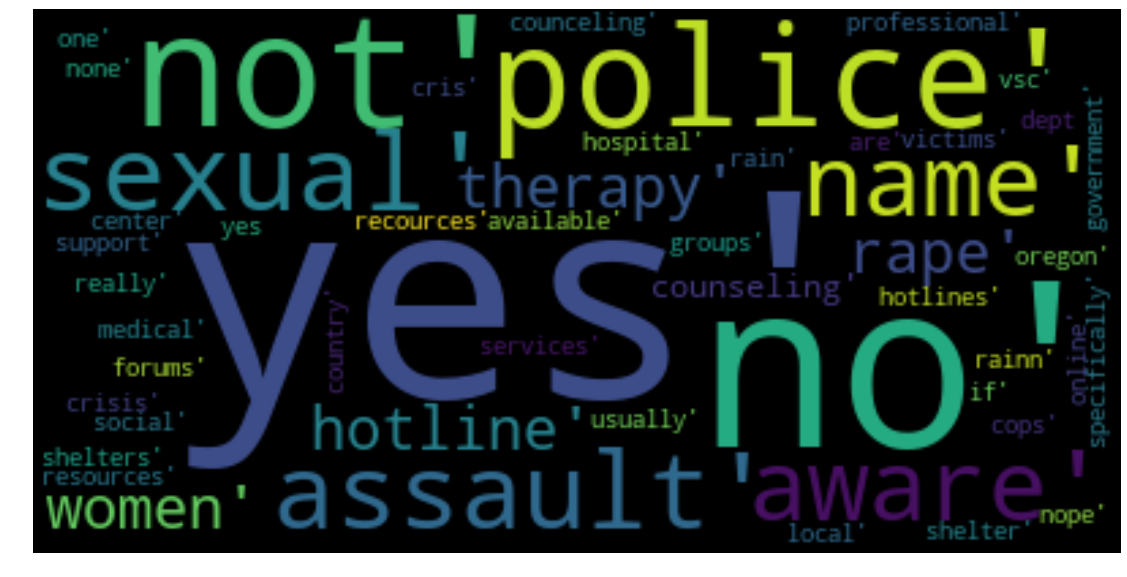

In [25]:
from wordcloud import WordCloud

# Create and generate a word cloud image

wordcloud = WordCloud().generate(str(revised_list))

# Display the generated image:

plt.figure(figsize=(25,10))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

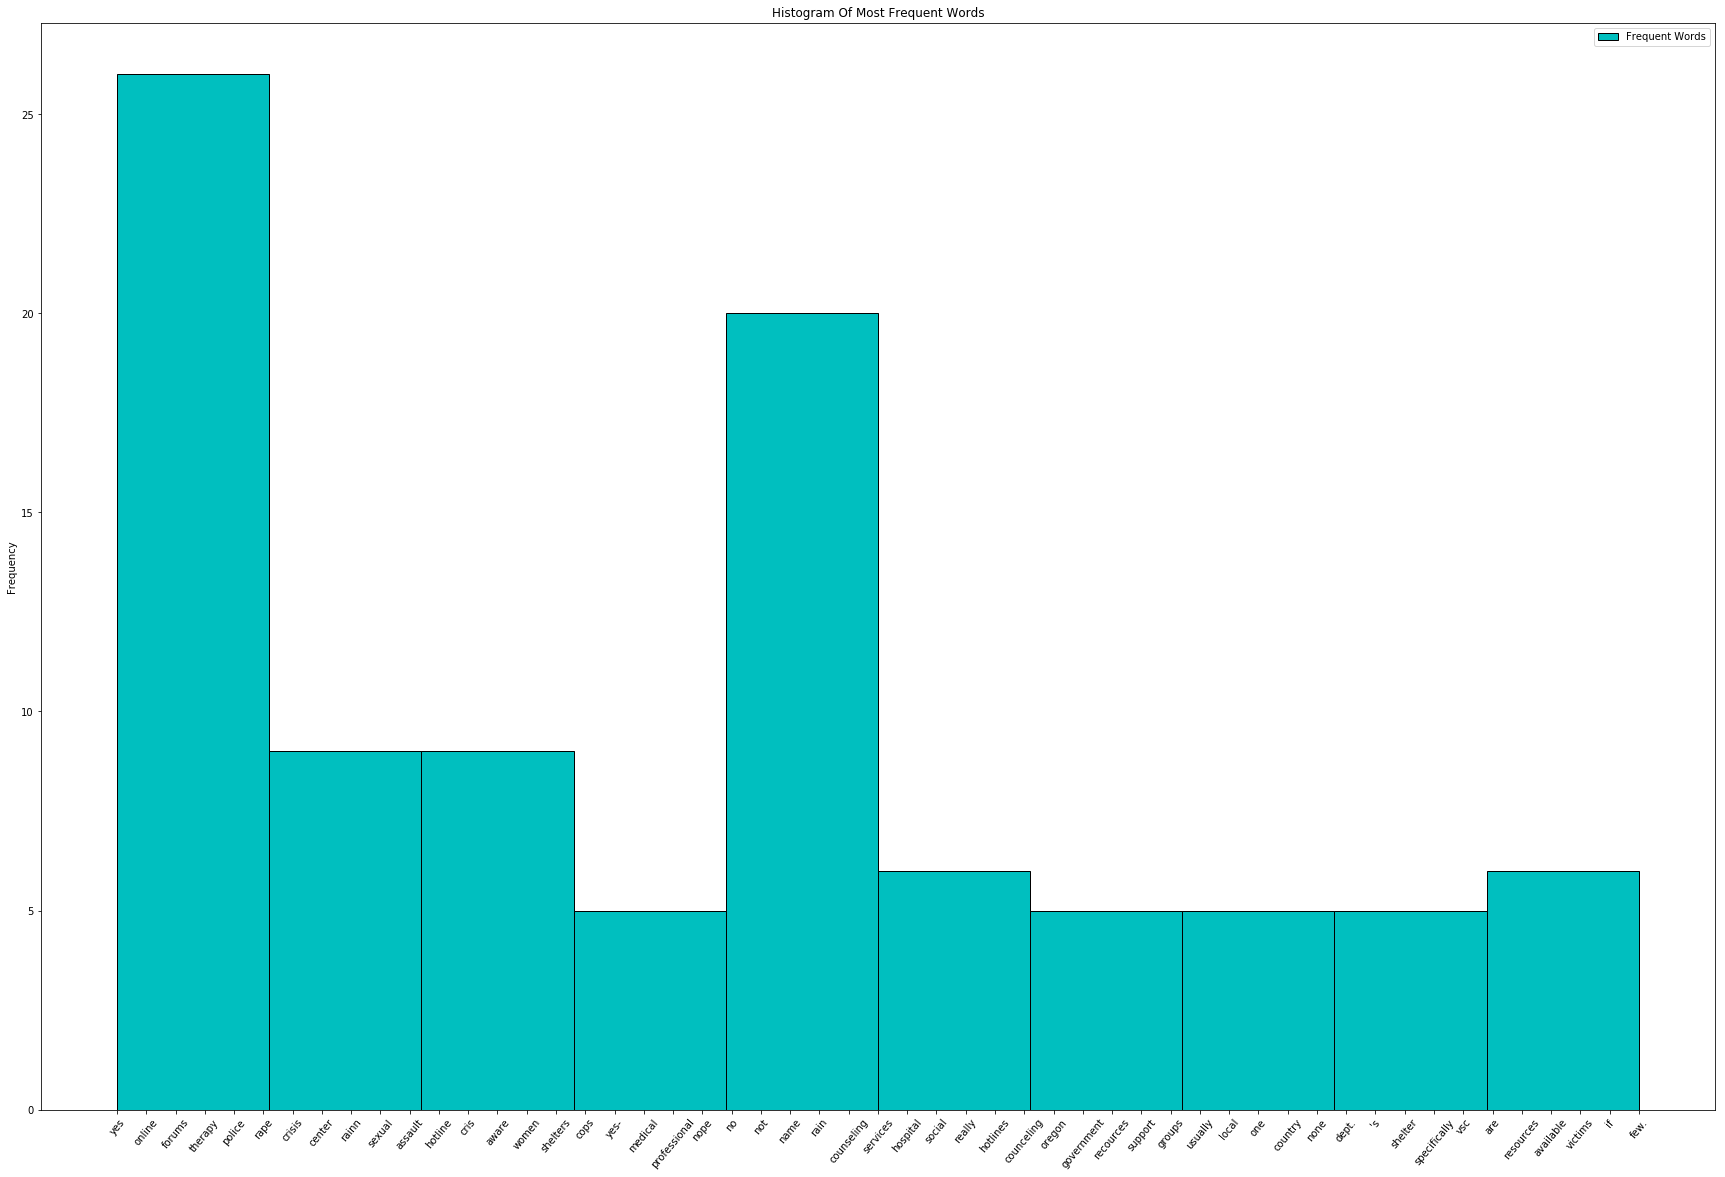

In [26]:
## Generating histogram for understanding frequency of common words in the text

plt.figure(figsize=(30,20))
plt.hist(revised_list, histtype='bar', align='mid', color='c', label='Frequent Words',edgecolor='black')
plt.xticks(rotation=50)
plt.legend()
plt.ylabel("Frequency")
plt.title('Histogram Of Most Frequent Words')
plt.show()

## From the above analysis, in can be concluded that most of the victims have some form of awareness about the resources available post assault situations. Following resources are commonly referenced here:

### 1) Online Forums
### 2) Crisis Centers
### 3) Rainn
### 4) Hotlines
### 5) Counselling services


## ------------------------------------------------------------------------------------------------ ##

# Analyzing contents of column "Why didn’t you report?"

# Tokenizing and identifying keywords helpful for understanding views.

In [27]:
## Tokenizing column 

tokenized_word = word_tokenize(str(inputFile['Why didn’t you report?']))


stop_words=set(stopwords.words("english"))

filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        if '1.1' not in w:
            if '...' not in w:
                if '.' not in w:
                    filtered_sent.append(w)

for item in filtered_sent:
    if (item.isnumeric()):
        filtered_sent.remove(item)

print("Filtered Sentence:",filtered_sent)

Filtered Sentence: ['2', 'WAS', 'AFRAID', 'He', 'police', 'officer', 'Nobody', 'would', 'believe', 'I', 'young', 'didnt', 'think', 'would', 'believe', "n't", 'seem', 'serious', 'enough', 'I', 'know', 'process', 'reporting', 'highly', 'mom', 'let', 'go', 'beacuse', 'dad', 'w', '9', '10', 'embarrassed/', 'want', 'talk', '12', 'I', 'lived', 'would', 'harmed', 'It', "n't", 'bad', '15', '17', 'I', 'young', 'know', 'wrong', 'really', '19', 'No', 'means', 'get', 'away', 'home', ',', 'knowledge', '21', 'I', "n't", 'know', 'time', 'I', 'da', 'I', "n't", 'know', 'going', 'Embarrassed', 'Did', "n't", 'want', 'cause', 'family', 'issues', 'Classic', ',', 'college', 'virgin', 'got', 'drunk', 'older', 'g', 'scared', '28', 'I', "n't", 'think', 'anyone', 'would', 'believe', 'Fear', 'judged', '734', 'Not', 'sure', 'scared', 'I', 'years', 'old', 'time', 'I', "'", '738', '740', 'At', 'time', 'I', 'embarrassed', 'I', 'drunk', 'I', "n't", 'want', 'tell', 'anyone', 'happened', '12', 'didnt', 'know', '745', '

In [28]:
unwanted_words = ['Respondent', 'ID', "n't", 'It', "n't", 'I', 'da', 'I', '6', "n't", 'Name', ':', 'Why', '’', 
                  'report', '?', ',', 'Length', ':', '763', ',', 'dtype', ':', 'object', 'f', "'", 'g', 'w', 'and'
                 'it', 'I','2','9','10','12','15','17','21','19','21','28','738','740','752','761','756','734','745']

revised_list = [ele for ele in filtered_sent if ele not in unwanted_words] 

revised_list = [x.lower() for x in revised_list]


for item in revised_list:
    if ('1.10' in item):
        revised_list.remove(item)
        
print(revised_list)

['was', 'afraid', 'he', 'police', 'officer', 'nobody', 'would', 'believe', 'young', 'didnt', 'think', 'would', 'believe', 'seem', 'serious', 'enough', 'know', 'process', 'reporting', 'highly', 'mom', 'let', 'go', 'beacuse', 'dad', 'embarrassed/', 'want', 'talk', 'lived', 'would', 'harmed', 'bad', 'young', 'know', 'wrong', 'really', 'no', 'means', 'get', 'away', 'home', 'knowledge', 'know', 'time', 'know', 'going', 'embarrassed', 'did', 'want', 'cause', 'family', 'issues', 'classic', 'college', 'virgin', 'got', 'drunk', 'older', 'scared', 'think', 'anyone', 'would', 'believe', 'fear', 'judged', 'not', 'sure', 'scared', 'years', 'old', 'time', 'at', 'time', 'embarrassed', 'drunk', 'want', 'tell', 'anyone', 'happened', 'didnt', 'know', 'afraid', 'scared', 'friend', 'boot', 'camp', 'the', 'person', 'assaulted', 'scared', 'embarrassed', 'fear', 'would', 'belive', 'child', 'would', 'even', 'traumatizing', 'because', 'it', 'was', 'attempted', 'and', 'fled', 'scene', 'with', 'want', 'deal', 's

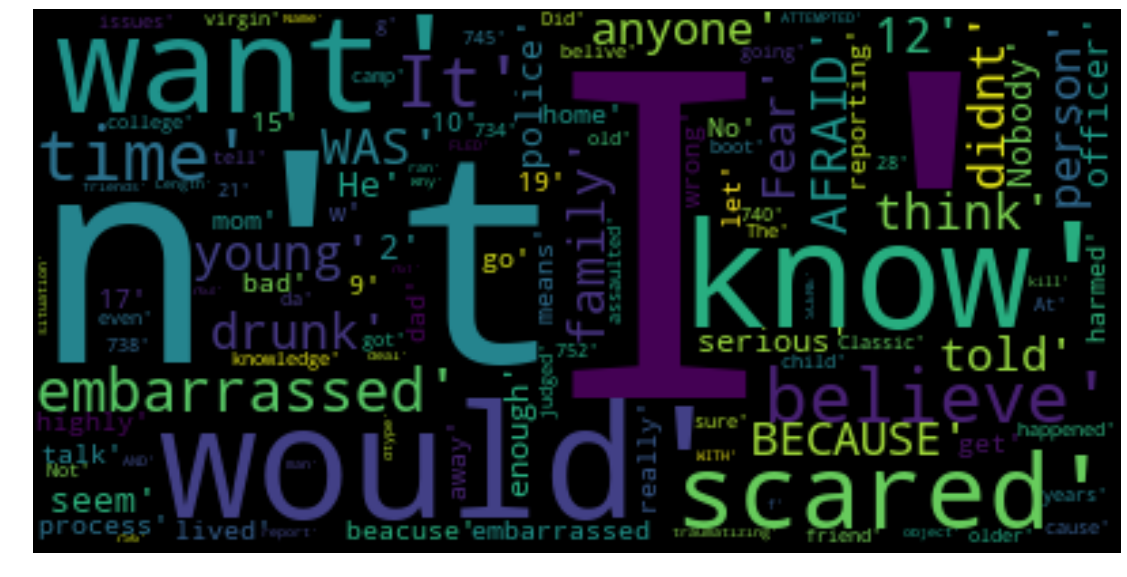

In [29]:
from wordcloud import WordCloud

# Create and generate a word cloud image

wordcloud = WordCloud().generate(str(filtered_sent))

# Display the generated image:

plt.figure(figsize=(25,10))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

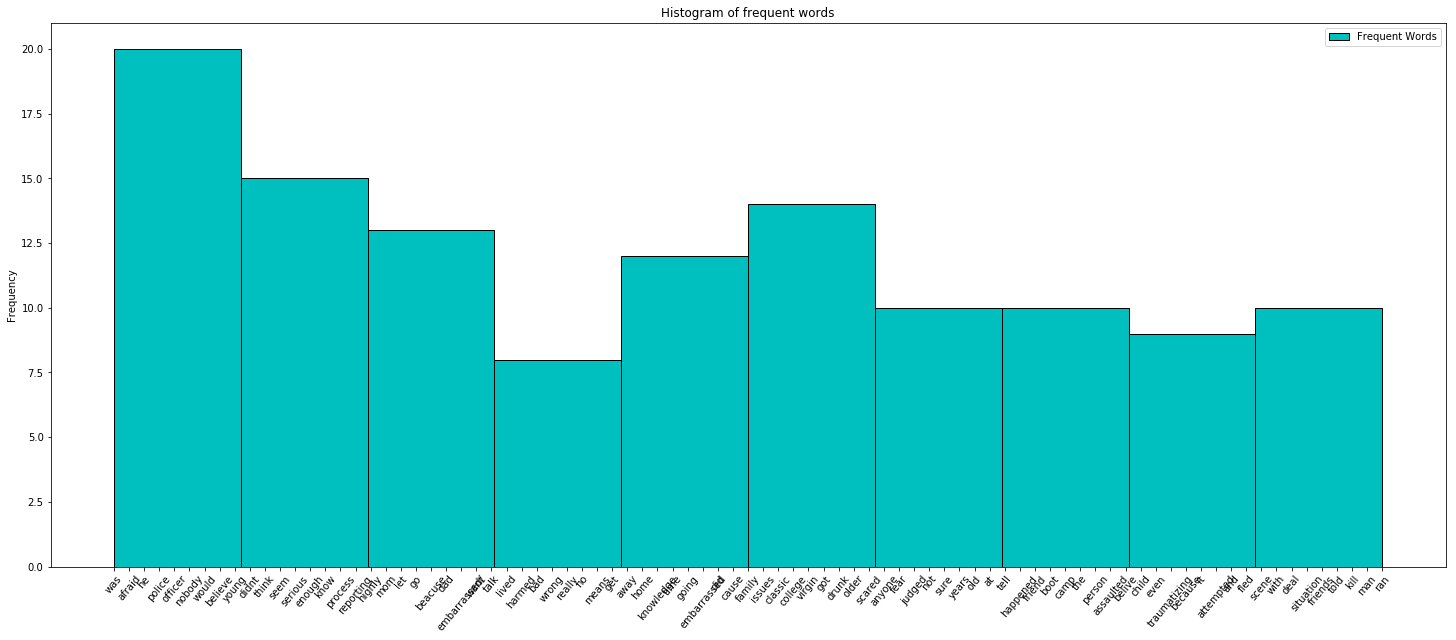

In [30]:
## Generating histogram for understanding frequency of common words in the text

plt.figure(figsize=(25,10))
plt.hist(revised_list, histtype='bar', align='mid', color='c', label='Frequent Words',edgecolor='black')
plt.xticks(rotation=50)
plt.legend()
plt.ylabel("Frequency")
plt.title('Histogram of frequent words')
plt.show()

## From the above analysis, in can be concluded that the following reasons are more or less responsible for holding back reporting :

### 1) Scared/Fear
### 2) Embarrased
### 3) Nobody would believe
### 4) Drunk state
### 5) Traumatized Experience
### 6) Assailant was a police personnel

## ----------------------------------------------------------------------------------------------------- ##

# Analyzing contents of column "What was your experience with the SAEK at the hospital?"

# Tokenizing and identifying keywords helpful for understanding views.

In [31]:
## Tokenizing column 

tokenized_word = word_tokenize(str(inputFile['What was your experience with the SAEK at the hospital?']))


stop_words=set(stopwords.words("english"))

filtered_sent=[]

for w in tokenized_word:
    if w not in stop_words:
        if w not in unwanted_words:
            if 'ID' not in w:
                if '.' not in w:
                    if '\\' not in w:
                        if w.isnumeric() is False:
                            filtered_sent.append(w)

print("Filtered Sentence:",filtered_sent)

Filtered Sentence: ['THEY', 'WERE', 'HELPFUL', 'applicable', 'na', 'na', 'none', 'one', 'unknown', 'experience', 'Not', 'applicable', 'go', 'hospital', 'There', 'penet', 'na', 'Not', 'applicable', 'Well', 'male', 'performed', 'ST', 'test', 'tell', 'tell', 'sexually', 'assaulted', 'doesnt', 'apply', 'none', 'none', 'No', 'experience', 'experience', 'na', 'applicable', 'What', 'experience', 'SAEK', 'hospital']


In [32]:
## Filtering list further

unwanted_words = ['na','I',"n't", '?', ',', 'Length', ':', ',', 'dtype', ':', 'object']
revised_list = [ele for ele in filtered_sent if ele not in unwanted_words] 
print(revised_list)

['THEY', 'WERE', 'HELPFUL', 'applicable', 'none', 'one', 'unknown', 'experience', 'Not', 'applicable', 'go', 'hospital', 'There', 'penet', 'Not', 'applicable', 'Well', 'male', 'performed', 'ST', 'test', 'tell', 'tell', 'sexually', 'assaulted', 'doesnt', 'apply', 'none', 'none', 'No', 'experience', 'experience', 'applicable', 'What', 'experience', 'SAEK', 'hospital']


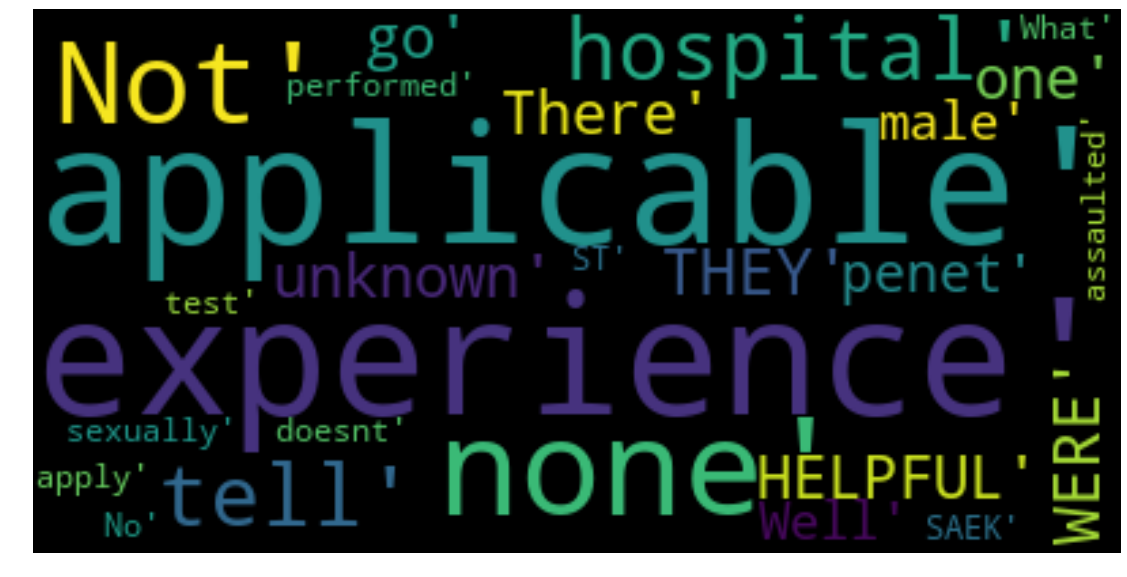

In [33]:
# Generating wordcloud

wordcloud = WordCloud().generate(str(revised_list))

# Display the generated image:

plt.figure(figsize=(25,10))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

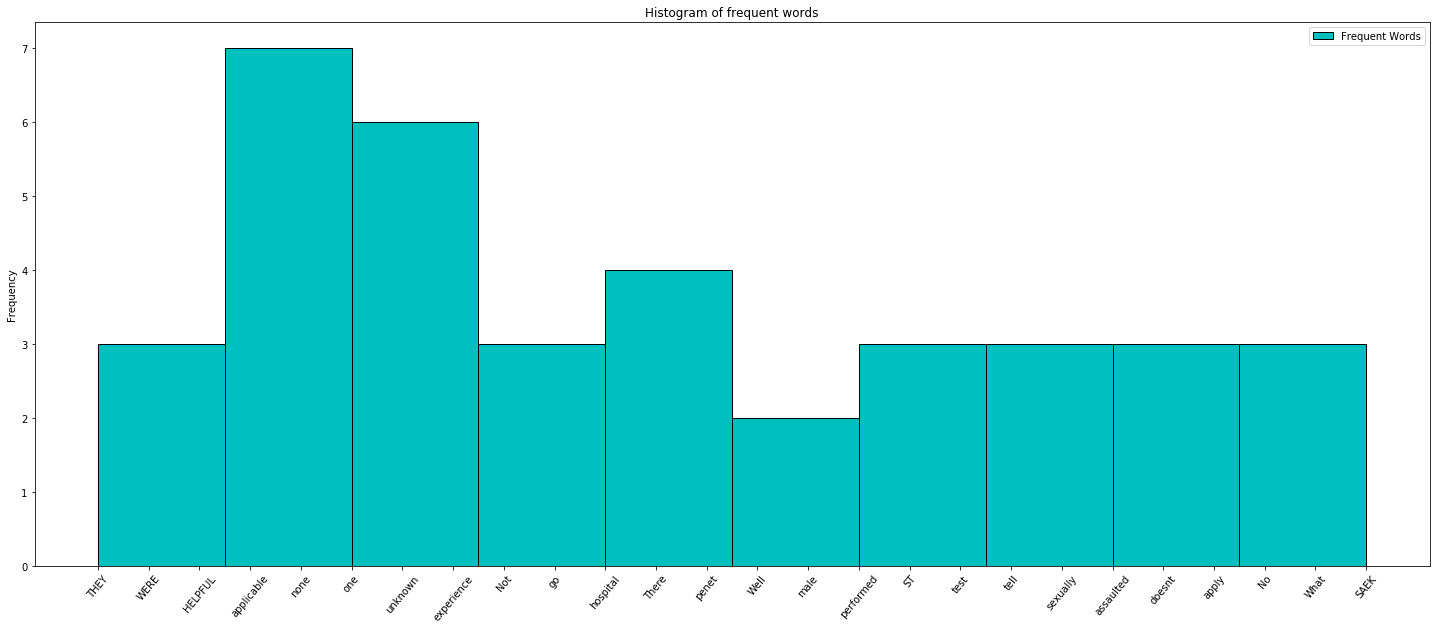

In [34]:
## Generating histogram for understanding frequency of common words in the text

plt.figure(figsize=(25,10))
plt.hist(revised_list, histtype='bar', align='mid', color='c', label='Frequent Words',edgecolor='black')
plt.xticks(rotation=50)
plt.legend()
plt.ylabel("Frequency")
plt.title('Histogram of frequent words')
plt.show()

### From the above analysis, in can be concluded some people have positive experience with SAEK at the hospital. However, lot more data is needed to arrive at a conclusion and generate overall sentiment analysis (positive or negative).

## ------------------------------------------------------------------------------------------------------ ##

# Analyzing contents of column "Is there anything else that you would like to share?"

# Tokenizing and identifying keywords helpful for understanding views.

In [35]:
## Tokenizing column 

tokenized_word = word_tokenize(str(inputFile['Is there anything else that you would like to share?']))

#fdist = FreqDist(tokenized_word)

stop_words=set(stopwords.words("english"))

filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        if w.isnumeric() is False:
            filtered_sent.append(w)

print("Filtered Sentence:",filtered_sent)

Filtered Sentence: ['time', 'na', 'I', 'sexually', 'assaulted', 'adult', '.', 'I', 'di', '...', 'No', 'No', 'thank', 'No', 'resources', 'readily', 'available', '...', 'No', '.', 'Got', 'ta', 'love', "'s", 'rapist', 'Suprem', '...', 'No', ',', 'thank', '.', 'No', '.', 'Not', 'form', 'inquiry', 'No', '...', 'Even', 'someone', 'caught', 'molester', '...', 'Nope', 'No', 'No', 'thank', '.', 'none', 'No', 'No', '.', 'ok', 'slave', 'wages', 'No', 'NO', 'thank', ',', 'thank', 'Nope', '.', 'I', "n't", 'think', ':', ')', 'Name', ':', 'Is', 'anything', 'else', 'would', 'like', 'share', '?', ',', 'Length', ':', ',', 'dtype', ':', 'object']


In [36]:
## Filtering list further

unwanted_words = ['Respondent', 'ID', 'na', ':', '1.108816e+10', '1.108790e+10', '...', '.', 'I', 'di', '1.108736e+10',
                 '1.108732e+10', '1.108715e+10', '1.108615e+10', '1.107108e+10', '1.107108e+10', '1.107106e+10', '1.107106e+10', '1.107106e+10', '1.107106e+10', '1.107106e+10',
                 '1.108775e+10', '1.108769e+10', '1.108737e+10', '1.108733e+10', '1.108770e+10', '1.108718e+10', '1.108622e+10',
                 ')', '1.107105e+10', '1.108738e+10', '1.108605e+10', '?', ',', 'Length', '763', ',', 'dtype', 'object', '1.108602e+10', '1.107107e+10',
                  "n't", "'s", '.', 'I', 'di', '...', ',', 'Length', ':', ',', 'dtype', ':', 'object']

revised_list = [ele for ele in filtered_sent if ele not in unwanted_words] 

for item in revised_list:
    if '1.10' in item:
        revised_list.remove(item)
        
print(revised_list)

['time', 'sexually', 'assaulted', 'adult', 'No', 'No', 'thank', 'No', 'resources', 'readily', 'available', 'No', 'Got', 'ta', 'love', 'rapist', 'Suprem', 'No', 'thank', 'No', 'Not', 'form', 'inquiry', 'No', 'Even', 'someone', 'caught', 'molester', 'Nope', 'No', 'No', 'thank', 'none', 'No', 'No', 'ok', 'slave', 'wages', 'No', 'NO', 'thank', 'thank', 'Nope', 'think', 'Name', 'Is', 'anything', 'else', 'would', 'like', 'share']


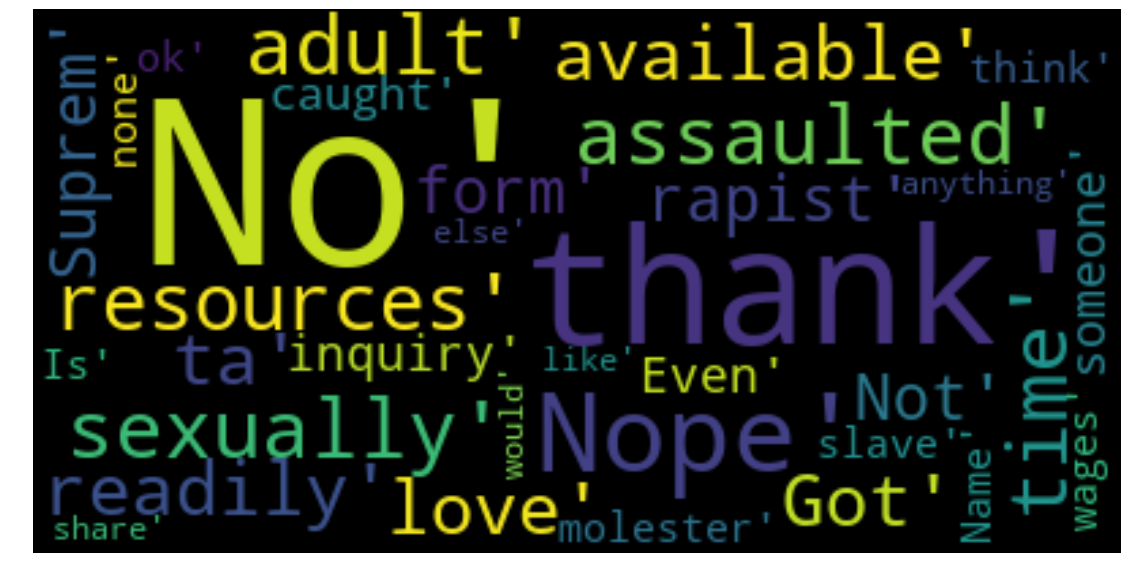

In [37]:
# Generating wordcloud

wordcloud = WordCloud().generate(str(revised_list))

# Display the generated image:

plt.figure(figsize=(25,10))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

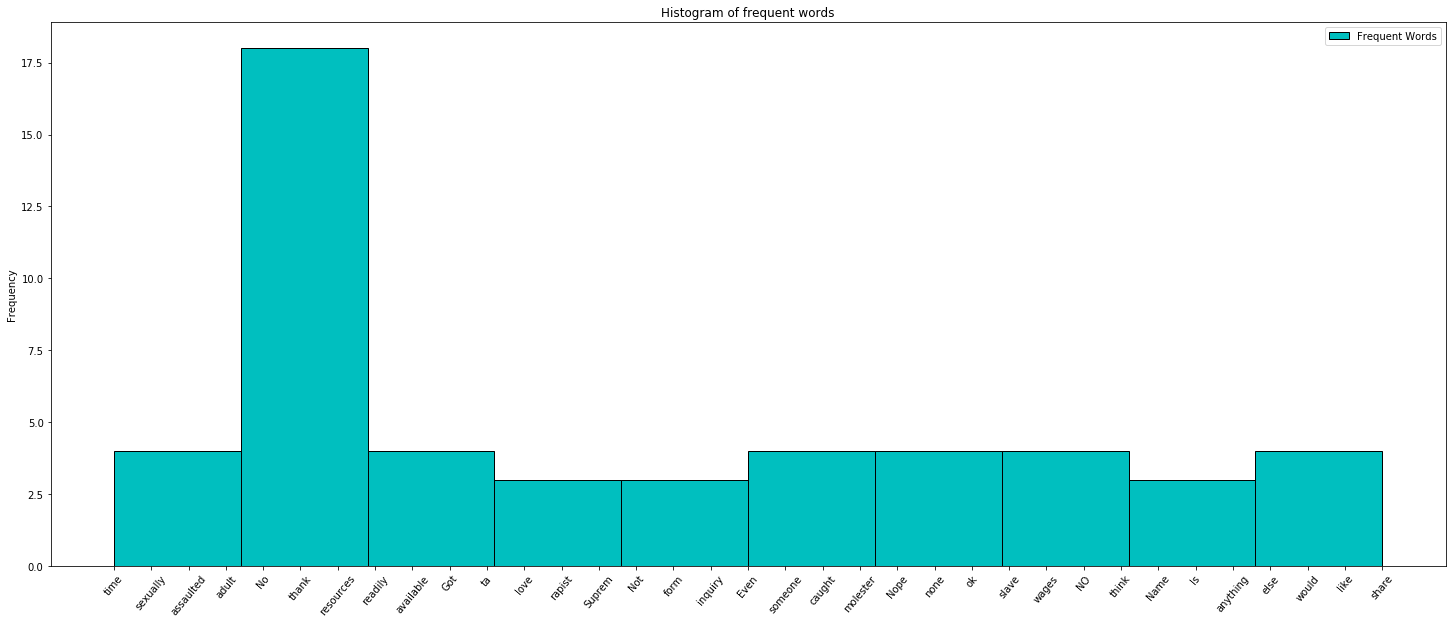

In [38]:
## Generating histogram for understanding frequency of common words in the text

plt.figure(figsize=(25,10))
plt.hist(revised_list, histtype='bar', align='mid', color='c', label='Frequent Words',edgecolor='black')
plt.xticks(rotation=50)
plt.legend()
plt.ylabel("Frequency")
plt.title('Histogram of frequent words')
plt.show()

## No visible pattern from the frequency distribution above. Need more data for further analysis

## ---------------------------------------------------------------------------------------------- ##

# Analyzing contents of column "Is there anything else that you would like to share?"

# Tokenizing and identifying keywords helpful for understanding views.

In [40]:
# Analyzing contents of column "Is there anything else that you would like to share?"

# Tokenizing and identifying keywords helpful for understanding views.

## Tokenizing column 

tokenized_word = word_tokenize(str(inputFile['What do you think of a legally admissible self-evidence collection kit?']))

#fdist = FreqDist(tokenized_word)

stop_words=set(stopwords.words("english"))

filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        if w.isnumeric() is False:
            filtered_sent.append(w)

print("Filtered Sentence:",filtered_sent)

Filtered Sentence: ['theoretically', ',', 'sounds', 'good', ',', 'lawyers', 'wou', '...', 'think', "'s", 'good', 'idea', '.', 'people', 'afraid', '...', 'I', 'think', 'would', 'good', 'idea', ',', 'since', 'I', 'kno', '...', 'dont', 'know', 'Great', 'idea', 'could', 'skewed', 'It', "'s", 'useful', 'people', 'want', 'pursue', '...', 'If', 'helps', 'I', 'think', 'pros', 'cons', '.', 'It', 'good', 'ide', '...', 'I', 'support', 'jt', 'I', "n't", 'done', 'research', 'I', 'honestl', '...', 'Unsure', 'implications', 'No', 'opinion', 'I', 'think', 'would', 'great', 'option', 'many', 'w', '...', 'I', 'would', 'think', 'traumatic', 'victims', 'se', '...', 'good', 'Depending', 'made', 'available', ',', 'cou', '...', 'I', 'think', 'step', 'right', 'direction', 'I', "'d", 'like', 'understand', '...', 'I', "n't", 'know', 'think', 'would', 'helpful', 'I', 'think', 'make', 'If', 'someon', '...', 'Good', 'thing', 'like', 'idea', 'I', 'think', 'sounds', 'technically', 'advanced', '.', 'I', "'m", '...', 

In [47]:
## Filtering list further

unwanted_words = [',','jt','?', ',', 'Length', ':', ',', 'dtype', ':', 'object', 'I', "n't", '...', '.', 'I', "'m",
                 '1','s', 'w','d', 'cou', 'ide', 'It', 'se', '!', '1', 'If', 'someon']

revised_list = [ele for ele in filtered_sent if ele not in unwanted_words] 

for item in revised_list:
    if '1.10' in item:
        revised_list.remove(item)
        
print(revised_list)

['theoretically', 'sounds', 'good', 'lawyers', 'wou', 'think', "'s", 'good', 'idea', 'people', 'afraid', 'think', 'would', 'good', 'idea', 'since', 'kno', 'dont', 'know', 'Great', 'idea', 'could', 'skewed', "'s", 'useful', 'people', 'want', 'pursue', 'helps', 'think', 'pros', 'cons', 'good', 'support', 'done', 'research', 'honestl', 'Unsure', 'implications', 'No', 'opinion', 'think', 'would', 'great', 'option', 'many', 'would', 'think', 'traumatic', 'victims', 'good', 'Depending', 'made', 'available', 'think', 'step', 'right', 'direction', "'d", 'like', 'understand', 'know', 'think', 'would', 'helpful', 'think', 'make', 'Good', 'thing', 'like', 'idea', 'think', 'sounds', 'technically', 'advanced', 'think', 'great', 'agencies', 'resou', 'sure', 'know', 'ideal', 'def', 'less', 'inv', 'idea', 'think', 'might', 'make', 'females', 'l', 'Sounds', 'good', "'s", 'embarrassing', 'enough', 'without', 'go', 'worked', 'fine', 'nothing', 'helpful', 'Good', 'idea', 'NOT', 'IN', 'FAVOR', 'OF', 'IT', 

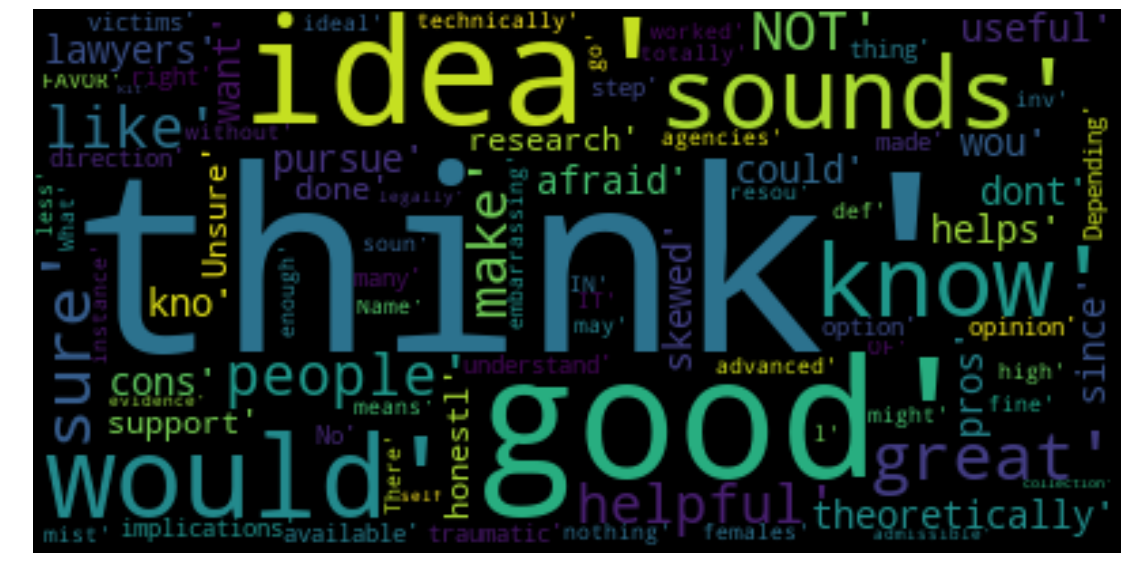

In [48]:
# Generating wordcloud

wordcloud = WordCloud().generate(str(revised_list))

# Display the generated image:

plt.figure(figsize=(25,10))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

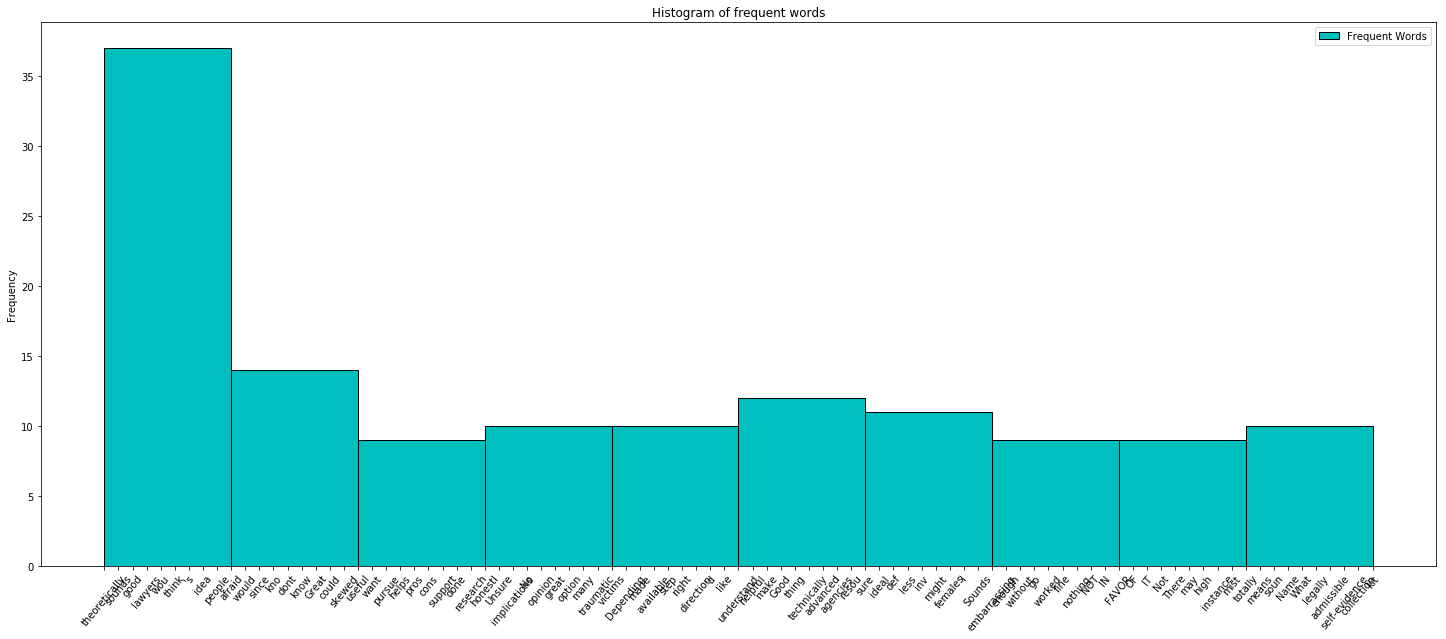

In [49]:
## Generating histogram for understanding frequency of common words in the text

plt.figure(figsize=(25,10))
plt.hist(revised_list, histtype='bar', align='mid', color='c', label='Frequent Words',edgecolor='black')
plt.xticks(rotation=50)
plt.legend()
plt.ylabel("Frequency")
plt.title('Histogram of frequent words')
plt.show()